# 02: Data Visualization

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # data visualization library
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns     # prettier data visualization library than matplotlib
from io import BytesIO     # From https://www.geeksforgeeks.org/stringio-and-bytesio-for-managing-data-as-file-object/#
import requests     # simple https library for python https://www.geeksforgeeks.org/python-requests-tutorial/
from datetime import datetime     # https://www.geeksforgeeks.org/python-datetime-module/
import re     # RegEx or Regular Expression library
import calendar
from scipy import stats

In [8]:
# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('white')

In [9]:
# Define my very own custom sunset color palette
sunset_melody = ['#252D6E',    # dark blue
                 '#6F5B96',    # purple
                 '#B3698A',    # mauve
                 '#F08A7B',    # salmon
                 '#FFA477']    # peach

sunset_cmap = LinearSegmentedColormap.from_list(sunset_melody, sunset_melody)
sns.set_palette(sunset_melody)

In [10]:
# Load the cleaned data of fatal crashes.
df = pd.read_csv('../data/cleaned_fatalities.csv')
df.head()

,unique_id,case_id_fkey,latitude,longitude,collision_year,death_date,death_time,death_datetime,collision_date,collision_time,...,police_district,data_as_of,data_loaded_at,age_category,collision_category,collision_hour,time_of_day,collision_year_clean,collision_month,collision_day
0,1,140236301,37.710409,-122.404226,2014,2014-03-20,11:21:00,2014-03-20 11:21:00,2014-03-20,NaN,...,INGLESIDE,2024-09-18 12:00:00,2025-04-08 04:35:01,Senior (65+),Pedestrian,NaN,Afternoon (12pm-5pm),2014,3,20
1,2,140755533,37.725476,-122.394243,2014,2014-09-08,16:38:00,2014-09-08 04:38:00,2014-09-08,05:10:00,...,BAYVIEW,2024-09-18 12:00:00,2025-04-08 04:35:01,Senior (65+),Pedestrian,5.0,Morning (5am-12pm),2014,9,8
2,4,140365546,37.748255,-122.413669,2014,2014-05-03,17:20:00,2014-05-03 05:20:00,2014-05-03,02:24:00,...,MISSION,2024-09-18 12:00:00,2025-04-08 04:35:01,Young Adult (18-34),Vehicle,2.0,Night (9pm-5am),2014,5,3
3,16,150562049,37.777300,-122.419694,2015,2015-06-30,06:00:00,2015-06-30 06:00:00,2015-06-28,03:52:00,...,NORTHERN,2024-09-18 12:00:00,2025-04-08 04:35:01,Adult (35-64),Motorcycle,3.0,Night (9pm-5am),2015,6,28
4,17,140104811,37.778251,-122.419883,2014,2014-02-06,10:20:00,2014-02-06 10:20:00,2014-02-05,02:26:00,...,NORTHERN,2024-09-18 12:00:00,2025-04-08 04:35:01,Adult (35-64),Pedestrian,2.0,Night (9pm-5am),2014,2,5


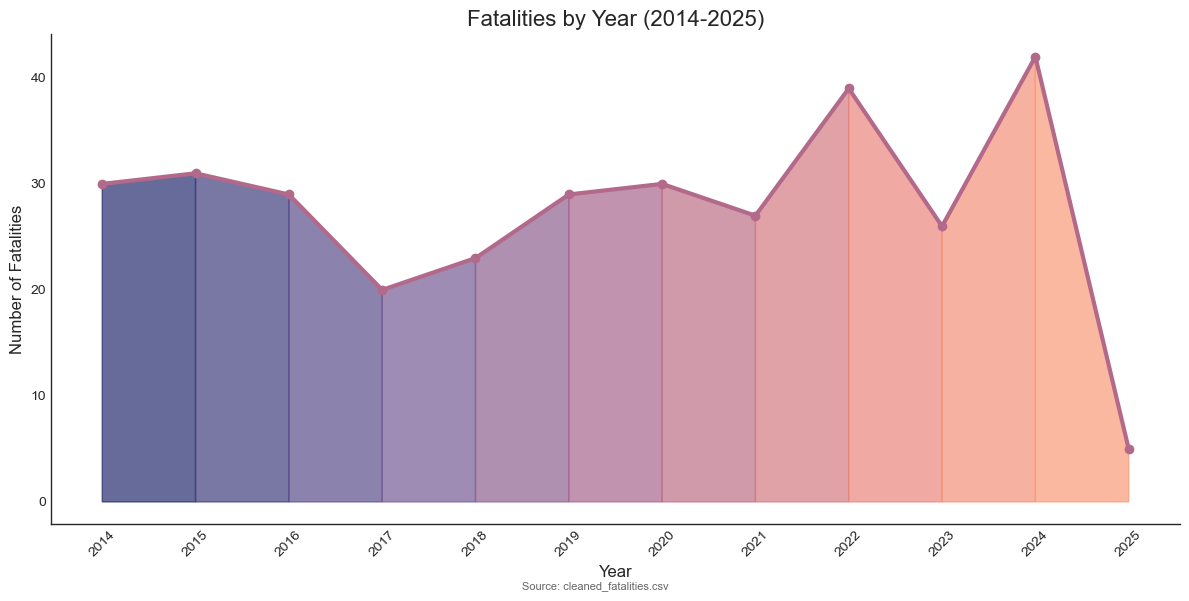



Fatalities by Year, 2014-2025:


    collision_year_clean  Count
0                   2014     30
1                   2015     31
2                   2016     29
3                   2017     20
4                   2018     23
5                   2019     29
6                   2020     30
7                   2021     27
8                   2022     39
9                   2023     26
10                  2024     42
11                  2025      5




In [11]:
# 2. Fatalities by year (line chart)
plt.figure(figsize = (12, 6))
year_counts = df.groupby('collision_year_clean').size().reset_index(name = 'Count')

# Create the line chart
plt.plot(year_counts['collision_year_clean'], 
         year_counts['Count'], 
         marker = 'o', 
         linewidth = 3, 
         color = sunset_melody[2]
        )

# Create gradient fill under the curve
x = year_counts['collision_year_clean']
y = year_counts['Count']

# For each x segment, create a polygon with gradient fill
for i in range(len(x)-1):
    # Create points for the polygon
    x_segment = [x[i], x[i+1], x[i+1], x[i]]
    y_segment = [y[i], y[i+1], 0, 0]
    
    # Calculate the color position in the gradient (0 to 1)
    color_pos = i / (len(x)-1)
    
    # Fill the polygon with the color from the gradient
    plt.fill(x_segment, y_segment, color = sunset_cmap(color_pos), alpha = 0.7)

# Add labels and title
plt.title('Fatalities by Year (2014-2025)', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.grid(False)

# Set x-axis ticks to show all years
plt.xticks(year_counts['collision_year_clean'], rotation = 45)

# Remove spines
sns.despine()

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Year, 2014-2025:')
print('\n')
print(year_counts)
print('\n')

NameError: name 'hour_counts' is not defined

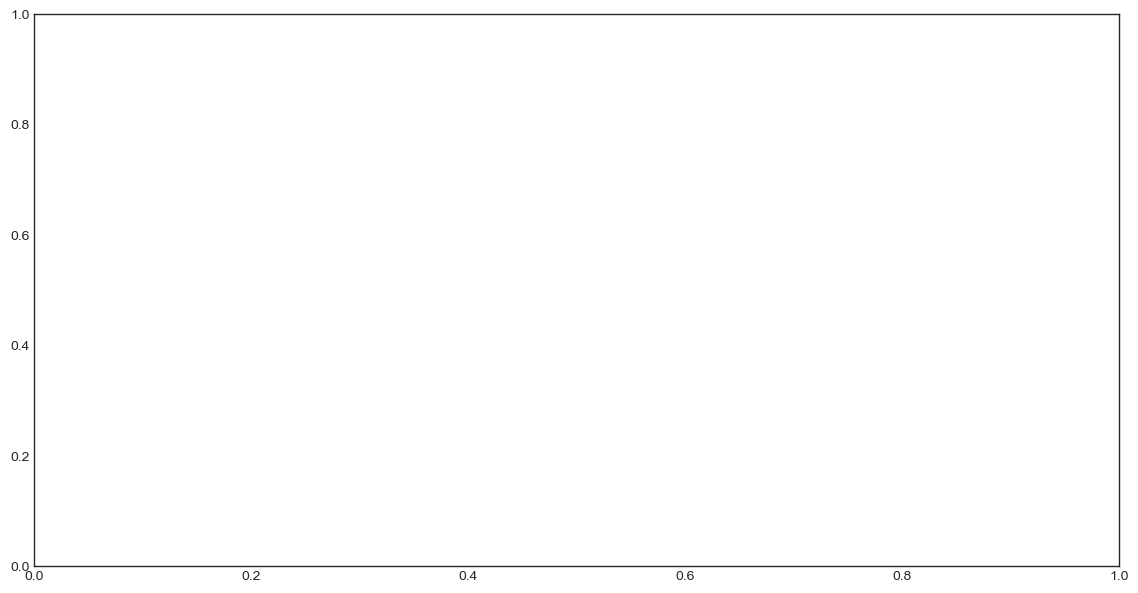

In [12]:
# Create a colormap from the sunset melody colors
cmap = mcolors.LinearSegmentedColormap.from_list('sunset_melody', sunset_melody)

# Create color array based on hour position
colors = cmap(np.linspace(0, 1, 24))

# Create a figure with appropriate size
fig = plt.figure(figsize=(14, 9))  # Increased height to accommodate all elements

# Create the main axis for the bar chart (notice we're not using gridspec here)
ax = plt.subplot2grid((10, 1), (0, 0), rowspan=8)  # Main plot takes 8/10 of the height

# Create the bar chart with gradient colors
bars = ax.bar(hour_counts['hour'], hour_counts['count'], color=colors, width=0.8)

# Format x-axis with hour labels (00:00, 01:00, etc.)
hour_labels = [f'{h:02d}:00' for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45)

# Set title and labels
ax.set_title('Fatal Collisions by Hour of Day, 2014-2025', fontsize = 16, pad = 20)
ax.set_xlabel('')
ax.set_ylabel('Number of Fatal Collisions', fontsize = 12)

# Set y-axis to start at 0
ax.set_ylim(bottom = 0)

# Add horizontal grid lines with dashed style
ax.yaxis.grid(True, linestyle = '--', alpha = 0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a colorbar in a separate subplot below the main plot
cbar_ax = plt.subplot2grid((10, 1), (9, 0), rowspan = 1)  # Colorbar takes bottom row
ColorbarBase(cbar_ax, cmap=cmap, orientation = 'horizontal')
cbar_ax.set_axis_off()  # Hide the axis of the colorbar

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha = 'center', fontsize = 10)

# Adjust the layout with more space between elements
plt.subplots_adjust(bottom = 0.1, hspace = 0.1)

plt.show()

# Print the table
print('\n')
print('Fatal Collisions by Hour of Day, 2014-2025:')
print('\n')
print(hour_counts)
print('\n')

In [ ]:
# 3. Fatalities by time of day (bar chart)
plt.figure(figsize = (10, 6))
time_counts = df['time_of_day'].value_counts().reset_index()
time_counts.columns = ['Time of Day', 'Count']

# Sort by a logical order of time
time_order = ['Morning (5am-12pm)', 'Afternoon (12pm-5pm)', 'Night (9pm-5am)']
time_counts['Time of Day'] = pd.Categorical(time_counts['Time of Day'], categories = time_order, ordered = True)
time_counts = time_counts.sort_values('Time of Day')

# Create the bar chart
ax = sns.barplot(
    x = 'Time of Day',
    y = 'Count', 
    data = time_counts,
    hue='Time of Day',  # Add hue parameter
    palette=sunset_melody[:3],  # Limit palette to only 3 colors (matching categories)
    legend=False  # Hide the legend since it's redundant
)

# Add labels and title
plt.title('Fatalities by Time of Day, 2014-2025', fontsize = 16)
plt.xlabel('Time of Day', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(time_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Time of Day, 2014-2025:')
print('\n')
print(time_counts)
print('\n')

In [ ]:
# Fatalities by Victim Type
# Create the plot
plt.figure(figsize=(12, 8))

# Plot each victim type
for i, victim in enumerate(victim_types):
    plt.plot(yearly_counts['year'], yearly_counts[victim], 
             marker='o', 
             linewidth=2.5 if victim == 'Pedestrian' else 2,
             color=sunset_melody[i % len(sunset_melody)],
             label=victim)

# Customize the plot
plt.title('Fatalities by Victim Type (2014-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(yearly_counts['year'], rotation=45)
plt.ylim(bottom=0)
plt.legend(title='Victim Type', loc='upper right')

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha='center', fontsize=10)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

# Print the table
print('\n')
print('Fatalities by Victim Type 2014-2025:')
print('\n')
print(yearly_counts)
print('\n')

In [ ]:
# 4. Fatalities by age category and collision category (grouped bar chart)
plt.figure(figsize = (12, 7))
age_collision = pd.crosstab(df['age_category'], df['collision_category'])

# Sort age categories in a logical order
age_order = ['Child (0-17)', 'Young Adult (18-34)', 'Adult (35-64)', 'Senior (65+)']
age_collision = age_collision.reindex(age_order)

# Create the grouped bar chart
ax = age_collision.plot(kind = 'bar', figsize = (12, 7), width = 0.8, colormap = sunset_cmap)

# Add labels and title
plt.title('Fatalities by Age Category and Collision Category 2014-2025', fontsize = 16)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines
sns.despine(left = False, bottom = False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Age Category and Collision Category, 2014-2025:')
print('\n')
print(age_collision)
print('\n')

In [ ]:
# Create a custom palette with enough colors for all victim types
# We'll cycle through the sunset melody colors and create variations
extended_palette = []
for color in sunset_melody:
    extended_palette.append(color)
    # Add a slightly lighter version of each color
    r, g, b = mcolors.to_rgb(color)
    lighter_color = (min(1, r*1.2), min(1, g*1.2), min(1, b*1.2))
    extended_palette.append(lighter_color)

# Create figure and axis
plt.figure(figsize=(12, 8))

# Define the order of victim types to match the image
victim_order = ['Pedestrian', 'Driver', 'Motorcyclist', 'Passenger', 
                'Bicyclist', 'Exterior Passenger', 'Standup Powered Device Rider']

# Create the box plot with ordered categories
ax = sns.boxplot(
    x='deceased',
    y='age',
    data=df,
    order=victim_order,  # Specify the order here
    hue='deceased',  # Add hue parameter
    palette=extended_palette[:8],  # Limit palette to number of categories
    width=0.6,
    fliersize=3,
    linewidth=1.5
)

# Set title and labels
plt.title('Age Distribution by Victim Type', fontsize=18, pad=20)
plt.xlabel('Victim Type', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Set y-axis limits
plt.ylim(0, 95)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Adjust tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha='center', fontsize=10, alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

# Print the table
print('\n')
print('Age Distribution by Victim Type, 2014-2025:')
print('\n')
print(df['deceased'])
print('\n')

In [ ]:
# Count fatalities by sex
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

# Calculate percentages
total = sex_counts['Count'].sum()
sex_counts['Percentage'] = (sex_counts['Count'] / total * 100).round(1)

# Create figure and axis
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sns.barplot(
    x='Sex',
    y='Count',
    data=sex_counts,
    palette=sunset_melody[:2],
    hue = 'Sex',
    width=0.6
)

# Add count and percentage labels on top of bars
for i, row in sex_counts.iterrows():
    ax.text(
        i, 
        row['Count'] + 5,  # Position text 5 units above the bar
        f"{int(row['Count'])}\n({row['Percentage']}%)",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Set title and labels
plt.title('Distribution of Fatalities by Sex', fontsize=18, pad=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)

# Set y-axis to start at 0 with some headroom for labels
plt.ylim(0, max(sex_counts['Count']) * 1.2)

# Remove spines
sns.despine()

# Add source information
plt.figtext(0.5, 0.01, 'Source: San Francisco Fatal Collision Data', 
            ha='center', fontsize=10, alpha=0.7)

# Add a brief annotation explaining the disparity
if len(sex_counts) >= 2 and sex_counts.iloc[0]['Count'] > sex_counts.iloc[1]['Count']:
    dominant_sex = sex_counts.iloc[0]['Sex']
    ratio = round(sex_counts.iloc[0]['Count'] / sex_counts.iloc[1]['Count'], 1)
    plt.figtext(
        0.5, 0.92,
        f"Male victims account for {ratio}x more traffic fatalities than female",
        ha='center', fontsize=12, style='italic', alpha=0.8
    )

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.90])

plt.show()

In [ ]:
# 1. Distribution of fatalities by collision category (bar chart)
plt.figure(figsize = (10, 6))
collision_counts = df['collision_category'].value_counts().reset_index()
collision_counts.columns = ['Collision Category', 'Count']

# Create the bar chart
ax = sns.barplot(
    x = 'Collision Category',
    y = 'Count', 
    data = collision_counts,
    hue = 'Collision Category',  # Add hue parameter
    palette = sunset_melody[:4],  # Limit palette to only 4 colors (matching categories)
    legend = False  # Hide the legend since it's redundant
    )

# Add labels and title
plt.title('Distribution of Fatalities by Collision Category, 2014-2025', fontsize = 16)
plt.xlabel('Collision Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(collision_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Distribution of Fatalities by Collision Category 2014-2025:')
print('\n')
print(collision_counts)
print('\n')

In [ ]:
# 6. Geographic distribution of fatalities (scatter plot on map)
plt.figure(figsize = (12, 10))

# Create a scatter plot colored by collision category
scatter = sns.scatterplot(
    x = 'longitude', 
    y = 'latitude', 
    hue = 'collision_category',
    palette = sunset_melody [:4],
    s = 100,
    alpha = 0.7,
    data = df
)

# Add labels and title
plt.title('Geographic Distribution of Fatalities, 2014-2025', fontsize = 16)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines and grid
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print summary statistics for geographic coordinates
print('\n')
print('Geographic Distribution Summary Statistics, 2014-2025:')
geo_stats = df[['latitude', 'longitude']].describe()
print('\n')
print(geo_stats)
print('\n')

In [ ]:
# 5. Heatmap of fatalities by month and day of week
plt.figure(figsize = (12, 8))

# First convert collision_date to datetime if it's not already
df['collision_date'] = pd.to_datetime(df['collision_date'], errors = 'coerce')

# Extract month and day of week
df['month_name'] = df['collision_date'].dt.month_name()
df['day_name'] = df['collision_date'].dt.day_name()  # Add this line if day_name isn't already created

# Create a crosstab of month and day of week
month_day_counts = pd.crosstab(df['month_name'], df['day_name'])

# Reorder months and days
month_order = list(calendar.month_name)[1:]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_day_counts = month_day_counts.reindex(month_order).reindex(columns = day_order)

# Create the heatmap
ax = sns.heatmap(month_day_counts, cmap = sunset_cmap, annot = True, fmt = 'd', linewidths = 0, cbar_kws = {'label': 'Number of Fatalities'})

# Add labels and title
plt.title('Heatmap of Fatalities by Month and Day of Week', fontsize = 16)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('Month', fontsize = 12)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Month and Day of Week:')
print('\n')
print(month_day_counts)
print('\n')

In [ ]:
# Statistical Analysis 1: Chi-square test for association between collision category and time of day
print('Statistical Analysis 1: Association between Collision Category and Time of Day')
contingency_table = pd.crosstab(df['collision_category'], df['time_of_day'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Contingency Table:\n{contingency_table}')
print(f'Chi-square statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
if p < 0.05:
    print('There is a significant association between collision category and time of day (p < 0.05)')
else:
    print('There is no significant association between collision category and time of day (p >= 0.05)')
print('\n')

In [ ]:
# Statistical Analysis 2: ANOVA test for age differences across collision categories
print('Statistical Analysis 2: Age Differences Across Collision Categories')
categories = df['collision_category'].unique()
age_by_category = [df[df['collision_category'] == cat]['age'].dropna() for cat in categories]
f_stat, p_val = stats.f_oneway(*age_by_category)
print(f'ANOVA F-statistic: {f_stat:.2f}')
print(f'p-value: {p_val:.4f}')
if p_val < 0.05:
    print('There are significant differences in age across collision categories (p < 0.05)')
else:
    print('There are no significant differences in age across collision categories (p >= 0.05)')

# Print mean age by collision category
age_means = df.groupby('collision_category')['age'].mean().reset_index()
age_means.columns = ['Collision Category', 'Mean Age']
print('\nMean Age by Collision Category:')
print(age_means)